In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14086, done.
remote: Total 14086 (delta 0), reused 0 (delta 0), pack-reused 14086
Receiving objects: 100% (14086/14086), 12.70 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (9584/9584), done.


In [ ]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!cat Makefile
!make

/content/darknet
GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla A100 (GA100), DGX-A100, RTX 3080
# ARCH= -gencode arch=compute_80,code=[sm_80,compute_80]

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 

In [ ]:
!mv /content/yolo_proj.zip /content/darknet/data/

In [ ]:
!rm -r /content/darknet/src/image.c

rm: cannot remove '/content/darknet/src/image.c': No such file or directory


In [ ]:
!mv /content/image.c /content/darknet/data/

mv: cannot stat '/content/image.c': No such file or directory


In [ ]:
!unzip /content/darknet/data/yolo_proj.zip -d /content/darknet/data/ # adjust the dataset filename which you have downloaded from Google drive

Archive:  /content/darknet/data/yolo_proj.zip
   creating: /content/darknet/data/yolo_proj/labels/
  inflating: /content/darknet/data/yolo_proj/labels/03ae6ca253.txt  
  inflating: /content/darknet/data/yolo_proj/labels/046c6bb18f.txt  
  inflating: /content/darknet/data/yolo_proj/labels/0a8d3d36b7.txt  
  inflating: /content/darknet/data/yolo_proj/labels/124e09f97c.txt  
  inflating: /content/darknet/data/yolo_proj/labels/15b92ab604.txt  
  inflating: /content/darknet/data/yolo_proj/labels/1bcf5dbc8e.txt  
  inflating: /content/darknet/data/yolo_proj/labels/1e4795564d.txt  
  inflating: /content/darknet/data/yolo_proj/labels/2afb1d1165.txt  
  inflating: /content/darknet/data/yolo_proj/labels/3401505f05.txt  
  inflating: /content/darknet/data/yolo_proj/labels/349f052414.txt  
  inflating: /content/darknet/data/yolo_proj/labels/3ed4bbffb4.txt  
  inflating: /content/darknet/data/yolo_proj/labels/516ecfa53f.txt  
  inflating: /content/darknet/data/yolo_proj/labels/5613e34f93.txt  
  in

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2020-07-31 10:03:25--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   451KB/s    in 76s     

2020-07-31 10:04:43 (454 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [ ]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 GPU isn't used 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max         

In [ ]:
!sed -i 's/batch=1/batch=64/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/subdivisions=1/subdivisions=16/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/max_batches = 500200/max_batches = 10000/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/steps=400000,450000/steps=8000,9000/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/classes=80/classes=4/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/filters=255/filters=27/g' cfg/yolov3-tiny_obj.cfg
!cat cfg/yolov3-tiny_obj.cfg

[net]
# Testing
#batch=64
#subdivisions=16
# Training
batch=64
subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 10000
policy=steps
steps=8000,9000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filters=102

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-tiny_obj.cfg yolov3-tiny.conv.15 

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
Couldn't open file: data/obj.data


In [ ]:
!mv /content/yolov3-tiny_obj_last.weights /content/darknet/backup

mv: cannot stat '/content/yolov3-tiny_obj_last.weights': No such file or directory


In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-tiny_obj.cfg backup/yolov3-tiny_obj_last.weights /content/PAN_Original.png

   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x  13 x 256 ->   13 x  13 x 512 0.399 BF
  11 max                2x 2/ 1     13 x  13 x 512 -

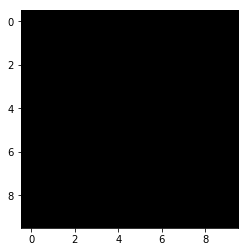

In [ ]:
def display_image(file_path = '/content/darknet/predictions.jpg'):
   import cv2
   import matplotlib.pyplot as plt
   import os.path
   if os.path.exists(file_path):
     img = cv2.imread(file_path)
     show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     plt.imshow(show_img)
   else:
     print('failed to open file')
display_image()